<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 4) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Probability Distributions](#dist)**
     - 2.1 - **[Discrete Probability Distributions](#dis)**
         - 2.1.2 - **[Binomial Distribution](#binomial)**
         - 2.1.3 - **[Poisson Distribution](#poisson)**
     - 2.2 - **[Continuous Probability Distributions](#cont)**
         - 2.2.1 - **[Normal Distribution](#normal)**
3. **[Sampling](#sample)**
    - 3.1 - **[Simple Random Sample](#SRS)**
4. **[Central Limit Theorem (CLT)](#CLT)**
5. **[Parameter Estimation](#est)**
    - 5.1 - **[Point Estimation](#pt)**
        - 5.1.1 - **[Sampling Error](#err)**
    - 5.2 - **[Interval Estimation for Mean](#int)**
        - 5.2.1 - **[Large Sample Size](#large)**   
        - 5.2.2 - **[Small Sample Size](#small)**
    - 5.3 - **[Interval Estimation for Proportion](#prop)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random # to introduce randomness in selection
import statistics
from scipy import stats # Library for statistical calculations
import warnings
warnings.filterwarnings("ignore")

The study of statistics is mainly divided into two parts: `Descriptive` and `Inferential`.

Here we mainly focus on `Inferential Statistics`. Before that, let us recall the descriptive statistics methods learned as a part of exploratory data analysis.

<a id="dist"></a>
# 2. Probability Distributions

Probability distributions are used to understand and analyze the patterns in the data. It is a mathematical function that gives the probabilities of all the outcomes of an experiment. 

There are two types of probability distributions based on the type of random variable; discrete and continuous probability distributions.

<a id="dis"></a>
## 2.1 Discrete Probability Distributions

It is the probability distribution related to the discrete random variable. In this case, the `probability mass function (pmf)` gives the probability that a variable is equal to a specific value. For a discrete random variable `X`, pmf of X is given as $ P(X = x_{i})$, where $x_{i}$ for i = 1, 2, ..., n are the values taken by the variable X.

The sum of all the probabilities is always 1. i.e. $\sum_{i = 1}^{n} P(X = x_{i}) = 1$

For a discrete random variable X with values $x_{1}, x_{2}, ..., x_{n}$ the `cumulative distribution function (cdf)` is denoted by F(x) and defined as:

<p style='text-indent:25em'> <strong> $ F(x_{i}) = P[X \leq x_{i}]$</strong> </p>

The cdf of a random variable returns the probability that the variable takes all the values less than or equal to the specific value.

<a id="binomial"></a>
### 2.1.1 Binomial Distribution

A discrete variable X taking values 0, 1, 2,..., n follows a binomial distribution with parameters `n` and `p`, if the pmf of X is given by:

<p style='text-indent:25em'> <strong> $ P(X = x) = {n \choose x} p^{x}q^{n-x}$</strong> $\hspace{2cm}$  x = 0, 1, ..., n </p>

`p` denotes the probability of success of an experiment and `q` denotes the probability of failure. (where, p + q = 1)

If `n` independent bernoulli trials (each with `p` as probability of success) are executed then the number of successes follows a binomial distribution.

The mean and variance of the distribution is given as:<br>

Mean = $np$

Variance = $npq$ 

### Example:

#### 1. Heaven Furnitures (HF) sells furniture like sofas, beds and tables. It is observed that 25% of their customers complain about the furniture purchased by them for many reasons. On Tuesday, 20 customers purchased furniture products from HF. 

Consider a discrete random variable X representing the customer who purchased the furniture products. Here X follows binomial distribution with `n = 20, p = 0.25`. 

#### a. Calculate the probability that exactly 3 customers will complain about the purchased products.

In [2]:
#Bionomial distribution problem
n = 20
p = 0.25

# Exact probability
k=3 

prob_exact=stats.binom.pmf(k,n,p)
print("Required Exact Probability:", round(prob_exact,3))


Required Exact Probability: 0.134


We plot a barplot to visualize the pmf of X.

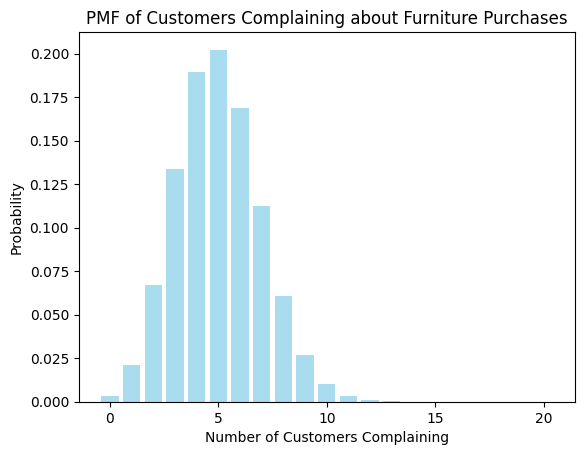

In [3]:
# Values of X (number of customers complaining)
x_values = np.arange(0, n+1)

# Probability mass function (PMF) for each value of X
pmf_values = stats.binom.pmf(x_values, n, p)

# Plotting the barplot
plt.bar(x_values, pmf_values, color='skyblue', alpha=0.7)

# Adding labels and title
plt.title('PMF of Customers Complaining about Furniture Purchases')
plt.xlabel('Number of Customers Complaining')
plt.ylabel('Probability')

# Display the plot
plt.show()

####  b. Calculate the probability that more than 3 customers will complain about the furniture purchased by them.

In [4]:
#We need 3 or more complaints probability so we use binom.sf
prob_sf=stats.binom.sf(k,n,p)
print("Required Survival Probability:", round(prob_sf,3))

Required Survival Probability: 0.775


####  c. Calculate the probability that  3 or less than 3 customers will complain about the furniture purchased by them.

In [5]:
#We need 3 or less complaints probability so we use binom.cdf
prob_cdf=stats.binom.cdf(k,n,p)
print("Required Cumulative Probability:", round(prob_cdf,3))

Required Cumulative Probability: 0.225


#### 2. In a shooting academy, data was collected on the precision shooting of a student. From 15 shots fired 11 were on target. Consider the same student, what is the probability that out of 50 shots fired, exactly 35 will hit the target?

In [6]:
p=(11/15)
n=50

# Exact probability
k=35

prob_exact_target_hit=stats.binom.pmf(k,n,p)
print("Required Exact Probability of Hitting Target:", round(prob_exact_target_hit,3))


Required Exact Probability of Hitting Target: 0.107


<a id="cont"></a>
## 2.2 Continuous Probability Distributions

It is the probability distribution related to the continuous random variable. The area under `probability density function (pdf)` gives the probability that a variable lies in a specific range. The value of pdf at a specific point is always 0.

Probability that X lies between [a,b] is given by:

<p style='text-indent:25em'> <strong> $P(a \leq X \leq b) = \int_{a}^{b} f(x) dx$</strong> </p> 

Area under the curve is 1. i.e. $\int_{-\infty}^{\infty} f(x) dx = 1$

For a continuous random variable X the `cumulative distribution function (cdf)` is denoted by F(x) and defined as:

<p style='text-indent:25em'> <strong> $ F(x) = \int_{-\infty}^{x} f(u) du$</strong> </p>

The cdf of a random variable returns the probability that the variable takes all the values less than or equal to the specific value.

<a id="normal"></a>
### 2.2.1 Normal Distribution

A continuous variable X follows a normal distribution with the parameters $\mu$ and $\sigma$ if the pdf of X is given by:

<p style='text-indent:25em'> <strong> $f(x) = \frac {1}{\sigma\sqrt(2 \pi)} e^\frac {-(x-\mu^2)}{2\sigma^2}$</strong></p>

The normal distribution is a bell-shaped symmetric distribution with `mean = median = mode`. 

The mean and variance of the distribution is given as:<br>

Mean = $\mu$ 

Variance = $\sigma^{2}$ 

**Note:** The variable Z given as, Z = $\frac{X - \mu}{\sigma}$ follows a `standard normal distribution` with mean 0 and variance 1.

### Example:

#### 1. A survey was conducted and it was found that the people spend their 300 minutes in a day surfing on online shopping sites on average and the corresponding standard deviation is 127 minutes. Assume that the time spent on surfing follows a normal distribution. Calculate the following probabilities:

Consider a continuous random variable X representing the time spent in surfing on online shopping sites. Here X follows a normal distribution with mean 300 and standard deviation as 127.


#### a. What is the probability that the users are spending less than or equal to 100 minutes per day?

In [7]:
mu=300
sigma=127
x=100

#We have to find P(x<=100)

#Step1: Find the zscore 
zscore = (x-mu)/sigma

#Step2: We will use norm.cdf(zscore) as we need to find P(x<=100)
prob_norm_cdf=stats.norm.cdf(zscore)

print("Required Cumultaive Probability:", round(prob_norm_cdf,3))

Required Cumultaive Probability: 0.058


We plot a distribution plot to visualize the cdf of X.

The above plot returns the probability that the users are spending less than or equal to 100 minutes surfing  on online shopping sites.

#### b. What is the probability that people are spending more than 400 minutes on online shopping sites per day?

In [8]:
mu=300
sigma=127
x=400

#We have to find P(x>400)

#Step1: Find the zscore 
zscore = (x-mu)/sigma

#Step2: We will use norm.sf(zscore) as we need to find P(x<=100)
prob_norm_sf=stats.norm.sf(zscore)

print("Required Survival Probability:", round(prob_norm_sf,3))

Required Survival Probability: 0.216


#### c. What is the probability that people are spending time between 250 minutes and 350 minutes per day?

In [9]:
mu=300
sigmae=127
x1=250
x2=350

#We have to find P(x>400)

#Step1: Find the zscore for x1 and x2
zscore1 = (x1-mu)/sigma
zscore2 = (x2-mu)/sigma

#Step2: We will use norm.sf(zscore) as we need to find P(x<=100)
prob1=stats.norm.cdf(zscore1)
prob2=stats.norm.cdf(zscore2)

print("Required Probability:", round(prob2-prob1,3))

Required Probability: 0.306


#### 2. A monthly balance in the bank account of a credit card holders is assumed to be normally distributed with mean 500 dollars and variance 100 dollars. What is the probability that the balance can be more than 513.5 dollars?

In [10]:
mu=500
sigma=np.sqrt(100)

x=513.5

#Since the variable is normally distributed we can use normal distribution functions
z=(x-mu)/sigma

prob=stats.norm.sf(z)
print("Required Probability:", round(prob,3))

Required Probability: 0.089


<a id="sample"></a>
# 3. Sampling

It is the method of selecting a subset of observations from the population which is used as a representative of the population.

The value associated with the characteristic of the population is known as a `parameter` and the characteristic of the sample is described by a `statistic`. The sample from a population is used to estimate the values of parameters.

Different types of sampling: Simple Random, Stratified, Systematic, and Cluster sampling.

<a id="SRS"></a>
## 3.1 Simple Random Sample

It is one of the sampling methods in which each observation in the population has an equal chance (probability) of being selected as the sample. It is the most basic type of sampling.

Simple random sampling can be done with/without replacement.

In Simple Random Sampling With Replacement (`SRSWR`) an observation can occur multiple times, as we replace the selected observation in the population before drawing the next sample. In this technique, the size of the population always remains the same. <br>
If there are `N` observations in the population then the probability of drawing `n` samples with replacement is $\frac{1}{N^{n}}$

### Example:

#### 1. Consider 8 identical boxes that contain different number of shuttlecocks. Draw a sample of 20 boxes with replacement.

data = [18, 13, 16, 17, 15, 21, 19, 12]

In [11]:
data = [18, 13, 16, 17, 15, 21, 19, 12]
#For sampling with replacement we can use random.choices
sample= random.choices(data,k=20)
print("Sample with replacement:", sample)

Sample with replacement: [18, 17, 19, 16, 12, 19, 13, 17, 18, 16, 17, 17, 12, 17, 16, 17, 21, 17, 21, 19]


In Simple Random Sampling Without Replacement (`SRSWOR`) an observation can occur only once as we do not replace the selected observation before drawing the next sample. <br>
If there are `N` observations in the population then the probability of drawing `n` samples without replacement is $\frac{1}{N \choose n}$

### Example:

#### 1.  An ice-cream manufacturer wants to study the sales of ice-creams to decide the production policies of the company. He collects the data for the number of ice-creams sold in a month from the 30 franchise. Randomly select the sales of 10 franchise for the study. 

data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91]

In [12]:
data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91]
#For sampling without replacement we can use random.sample
sample= random.sample(data,k=10)
print("Sample without replacement:", sample)

Sample without replacement: [25, 38, 95, 18, 88, 82, 62, 60, 93, 73]


In [13]:
data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91]
#For sampling without replacement we can use random.sample and have same value of sample everytime
random.seed(1)
sample= random.sample(data,k=10)
print("Same random sample without replacement:", sample)

Same random sample without replacement: [73, 25, 87, 69, 92, 62, 41, 76, 18, 34]


<a id="CLT"></a>
# 4. Central Limit Theorem

Let $X_{1}, X_{2}, X_{3},..., X_{n}$ be the random sample drawn from a population with mean $\mu$ and standard deviation $\sigma$. The central limit theorem states that, for sufficiently large n, the sample mean $\overline{X}$ follows an approximately normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

i.e. $\frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$ follows a standard normal distribution.

For a normally distributed population, the above result holds for any sample size.

For the population with distribution other than normal, generally, the sample size greater than or equal to 30 is considered as the large sample size.

Let us plot some graphs to demonstrate the CLT for positive, negative and normal population distribution.

#### Application of CLT in HIV Vaccine TRIAL

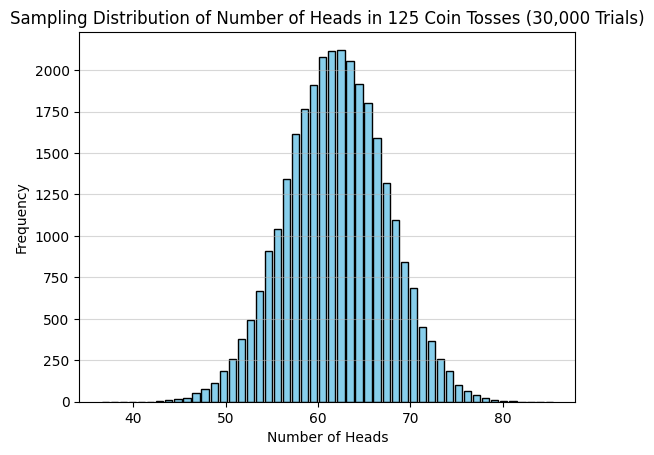

In [14]:
import random
import matplotlib.pyplot as plt

def coin_toss_experiment(num_tosses, num_trials):
    results = []
    for _ in range(num_trials):
        num_heads = sum(random.choice([0, 1]) for _ in range(num_tosses))
        results.append(num_heads)
    return results

def draw_histogram(data):
    plt.hist(data, bins=max(data)-min(data)+1, align='left', rwidth=0.8, color='skyblue', edgecolor='black')
    plt.xlabel('Number of Heads')
    plt.ylabel('Frequency')
    plt.title('Sampling Distribution of Number of Heads in 125 Coin Tosses (30,000 Trials)')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

if __name__ == "__main__":
    num_tosses = 125
    num_trials = 30000
    results = coin_toss_experiment(num_tosses, num_trials)
    draw_histogram(results)


Prob (n<51 or n>74) is 0.04 which is a P value which is less than 0.05 hence we conclude that vaccine is effective. 

<a id="est"></a>
# 5. Parameter Estimation

The value associated with the characteristic of the population is known as a `parameter` and the characteristic of the sample is described by a `statistic`.
Usually, the population parameters are not known in most of the real-life problems. Thus, we consider a subset of the population (sample) to estimate the population parameter using a sample statistic.

`Point estimation` and `Interval estimation` are two of the methods to estimate the population parameter.

<a id="pt"></a>
## 5.1 Point Estimation

This method considers a single value (sample statistic) as the population parameter. 

Let $X_{1}, X_{2}, X_{3},..., X_{n}$ be the random sample drawn from a population with mean $\mu$ and standard deviation $\sigma$. <br>
The point estimation method estimates the population mean, $\mu = \overline{X}$, where $\overline{X}$ is the sample mean and population standard deviation, $\sigma = s$, where $s$ is the standard deviation of the sample (`Standard Error`).

### Example:

#### 1. Consider the data of grade points for 35 students in a data science course. Select grades of 20 students randomly from the data and find the point estimate for the population mean.

     Grades: [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
              92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

In [15]:
data= [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 
       75.5, 76.2, 79.1, 80.1, 
        92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 
        41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]
random.seed(1)
sample=random.sample(data, k=20)
point_estimate=np.mean(sample)
print("Point Estimate:", round(point_estimate,2))

Point Estimate: 75.33


#### 2. A financial firm has created 50 portfolios. From them, a sample of 13 portfolios was selected, out of which 8 were found to be underperforming. Can you estimate the number of underperforming portfolios?

In [16]:
#proportion of underperforming portfolios 
p=(8/13)
n=50
#number of underperforming portfolios is np
print("Number of underperforming portfolios:", int(n*p))


Number of underperforming portfolios: 30


<a id="err"></a>
### 5.1.1 Sampling Error

Sampling error is considered as the absolute difference between the sample statistic used to estimate the parameter and the corresponding population parameter. Since the entire population is not considered as the sample, the values of mean, median, quantiles, and so on calculated on sample differ from the actual population values. 

One can reduce the sampling error either by increasing the sample size or determining the optimal sample size using various methods.

### Example:

#### 1. Consider the data for the number of ice-creams sold per day. An ice-cream vendor collected this data for 90 days and then a sample is drawn (without replacement) containing ice-creams sold for 25 days. 

data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 
        25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91, 94, 49, 57, 83, 96, 55, 
        79, 52, 59, 39, 58, 17, 19, 98, 15, 54, 48, 46, 72, 45, 65, 28, 37, 30, 
        68, 75, 16, 33, 31, 99, 22, 51, 27, 67, 85, 47, 44, 77, 64, 97, 84, 42, 
        90, 70, 74, 89, 32, 26, 24, 12, 81, 53, 50, 35, 71, 63, 43, 86, 78, 66]
        
sample = [10, 22, 47, 66, 11, 57, 77, 98, 31, 63, 74, 84, 50, 96, 88, 92, 70, 54, 65, 44, 16, 72, 20, 90, 43]

Comupte the sampling error for mean and standard error.

In [17]:
data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 
        25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91, 94, 49, 57, 83, 96, 55, 
        79, 52, 59, 39, 58, 17, 19, 98, 15, 54, 48, 46, 72, 45, 65, 28, 37, 30, 
        68, 75, 16, 33, 31, 99, 22, 51, 27, 67, 85, 47, 44, 77, 64, 97, 84, 42, 
        90, 70, 74, 89, 32, 26, 24, 12, 81, 53, 50, 35, 71, 63, 43, 86, 78, 66]
        
sample = [10, 22, 47, 66, 11, 57, 77, 98, 31, 63, 74, 84, 50, 96, 88, 92, 70, 54, 
          65, 44, 16, 72, 20, 90, 43]

pop_mean=np.mean(data)
samp_mean=np.mean(sample)

samp_error=samp_mean-pop_mean
print("Sampling Error:", round(samp_error,2))


pop_std=np.std(data)
samp_std=np.std(sample)

std_error=pop_std/np.sqrt(len(data))
print("Standard Error:", round(std_error,2))

print("Z value =", samp_error/std_error)

print("My sample estimate is good because Z value it close to 1 but not that great ;D")


Sampling Error: 3.1
Standard Error: 2.74
Z value = 1.132029832718953
My sample estimate is good because Z value it close to 1 but not that great ;D


<a id="int"></a>
## 5.2 Interval Estimation for Mean

This method considers the range of values in which the population parameter is likely to lie. The confidence interval is an interval that describes the range of values in which the parameter lies with a specific probability. It is given by the formula,<br> <p style='text-indent:20em'> `conf_interval = sample statistic ± margin of error`</p>

The uncertainty of an estimate is described by the `confidence level` which is used to calculate the margin of error. 

<a id="large"></a>
### 5.2.1 Large Sample Size

Consider a population with mean $\mu$ and standard deviation $\sigma$. Let us take a sample of `n` observations from the population such that, $n \geq 30$. The central limit theorem states that the sampling distribution of mean follows a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt(n)}$.

The confidence interval for the population mean with $100(1-\alpha)$% confidence level is given as: $\overline{X} \pm Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$

Where, <br>
$\overline{X}$: Sample mean<br>
$\alpha$: Level of significance<br>
$\sigma$: Population standard deviation<br>
$n$: Sample size

The quantity $\frac{\sigma}{\sqrt{n}}$ is the standard error of the mean. And the margin of error is given by $Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$.

If we know the expected margin of error (ME), then we can calculate the required sample size (n) using the formula: $n = (Z_{\frac{\alpha}{2}})^{2}\frac{\sigma^{2}}{ME^{2}}$.
 
The above equation is valid for any population provided the sample size is sufficiently large (usually $n \geq 30$). Relace $\sigma$ by the standard deviation of the sample ($s$) if the population standard deviation is not known.

The value of $Z_{\frac{\alpha}{2}}$ for different $\alpha$ values can be obtained using the `stats.norm.isf()` from the scipy library. 

In [18]:
# let us find the Z-values for different alpha values

# create an empty dataframe to store the alpha and corresponding Z-value
df_Z = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.1, 0.05, 0.02, 0.01] 

# use for loop to calculate the value for each alpha
for i in range(len(alpha)):
    alpha_by_2 = alpha[i] / 2
    
    # use 'stats.norm.isf()' to find the Z-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha_by_2' to the parameter 'q'
    # use 'round()' to round-off the value to 4 digits
    Z = np.abs(round(stats.norm.isf(q = alpha_by_2), 4))
    
    # create a dataframe using dictionary to store the alpha and corresponding Z-value
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "Z_alpha_by_2" : Z}, index = [i])
    
    # append the row to the dataframe 'df_Z'
    df_Z = pd.concat([df_Z, row])
    #df_Z = pd.append(row, ignore_index=True)

# print the final dataframe
df_Z

,alpha,Z_alpha_by_2
0,0.10,1.6449
1,0.05,1.9600
2,0.02,2.3263
3,0.01,2.5758


To calculate the confidence interval with 95% confidence, use the Z-value corresponding to `alpha = 0.05`. 

### Example:

#### 1. A random sample of weight (in kg.) for 35 diabetic patients is drawn from the population with a standard deviation of 8 kg. Find the 90% confidence interval for the population mean.

    Weight: [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.3, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
             92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

In [25]:
weight=[59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.3, 41.9, 55.2, 94.8, 
         84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
             92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 
         64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

n =35
pop_std=8
samp_mean=np.mean(weight)

#We want a 90% CI so we will take confidence of coefficeient as z=1.65
#or
z=stats.norm.isf(0.05)
print("Confidence of Coefficient:",round(z,2))

#Get the margin of error 
E=z*pop_std/np.sqrt(n)

ucl=samp_mean+E
lcl=samp_mean-E

print("90% Confidence Interval = ({}, {})".format(round(lcl,2),round(ucl,2)))

Confidence of Coefficient: 1.64
90% Confidence Interval = (74.46, 78.91)


In [27]:
#Alternate method
#Confidenece Interval by direct api
#stats.norm.interval(confidence, loc, scale)
conf_int=stats.norm.interval(0.9,loc=samp_mean, scale=pop_std/np.sqrt(n))
print("90% Confidence Interval:",conf_int)

90% Confidence Interval: (74.46146621975642, 78.90996235167215)


#### 2. There are 150 apples on a tree. You randomly choose 40 apples and found that the average weight of apples is 182 grams with a standard deviation of 30 grams. Find the 95% confidence interval for the population mean.

In [21]:
n=40
samp_mean=182
pop_std=30 #we have used samp_std as an estimate pop_std to find 95% of confidence interval
conf_int=stats.norm.interval(0.95, loc=samp_mean, scale=pop_std/np.sqrt(n))
print("95% Confidence Interval:",np.round(conf_int,2))

95% Confidence Interval: [172.7 191.3]


#### 3. A movie production house needs to estimate the average monthly wage of the technical crew members. The previous data shows that the standard deviation of the wages is 190 dollars. The production team thinks that the estimation of the average wage should not exceed 54 dollars. The team has decided to take a small subset of wages for the estimation. Find a suitable number of wages to be considered to get the estimate with 90% confidence.

#### 4. 100 bags of coal were tested and had an average of 35% of ash with a standard deviation of 15%. Calculate the margin of error for a 90% confidence level.

#### 5. From a sample of 250 observations, it is found that the average income of a 27 year old Londoner is £45,000 with a sample standard deviation of £4000. Obtain the 95% confidence interval to estimate the average income.

<a id="small"></a>
### 5.2.2 Small Sample Size

Let us take a sample of `n` observations from the population such that, $n < 30$. Here the standard deviation of the population is unknown. The confidence interval for the population mean with $100(1-\alpha)$% confidence level is given as: $\overline{X} \pm t_{\frac{\alpha}{2}, n-1}\frac{s}{\sqrt{n}}$

Where, <br>
$\overline{X}$: Sample mean<br>
$\alpha$: Level of significance<br>
$s$: Sample standard deviation<br>
$n-1$: degrees of freedom

The ratio $\frac{s}{\sqrt{n}}$ is the estimate of the standard error of the mean. And $t_{\frac{\alpha}{2}, n-1}\frac{s}{\sqrt{n}}$ is the margin of error for the estimate.

The value of $t_{\frac{\alpha}{2}, n-1}$ for different $\alpha$ values can be obtained using the `stats.t.isf()` from the scipy library.  

In [23]:
# let us find the t-values for different alpha values with 10 degrees of freedom

# create an empty dataframe to store the alpha and corresponding t-value
df_t = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.1, 0.05, 0.02, 0.01] 

# use for loop to calculate the t-value for each alpha value
for i in range(len(alpha)):
    alpha_by_2 = alpha[i] / 2
    
    # use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha_by_2' to the parameter 'q'
    # pass the 10 degrees of freedom to the parametr 'df' 
    # use 'round()' to round-off the value to 2 digits
    t = np.abs(round(stats.t.isf(q = alpha_by_2, df = 10), 2))

    # create a dataframe using dictionary to store the alpha and corresponding t-value 
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "t_alpha_by_2": t}, index = [i])

    # append the row to the dataframe 'df_t'
    df_t = df_t.append(row)

# print the final dataframe
df_t

AttributeError: 'DataFrame' object has no attribute 'append'

### Example:

#### 1. There are 150 apples on a tree. You randomly choose 17 apples and found that the average weight of apples is 78 grams with a standard deviation of 23 grams. Find the 90% confidence interval for the population mean.

<a id="prop"></a>
## 5.3 Interval Estimation for Proportion

Consider a population in which each observation is either a success or a failure. The population proportion is denoted by `P` which the ratio of the number of successes to the size of the population.

The confidence interval for the population proportion with $100(1-\alpha)$% confidence level is given as: $p \pm Z_{\frac{\alpha}{2}}\sqrt{\frac{p(1 - p)}{n}}$

Where, <br>
$p$: Sample proportion<br>
$\alpha$: Level of significance<br>
$n$: Sample size

The quantity $Z_{\frac{\alpha}{2}}\sqrt{\frac{p(1 - p)}{n}}$ is the margin of error.

### Example:

#### 1. A financial firm has created 50 portfolios. From them, a sample of 13 portfolios was selected, out of which 8 were found to be underperforming. Construct a 99% confidence interval to estimate the population proportion.

# END